# Finding the Secret to Academic Success 

- Student name: Gamze Turan
- Student pace: self paced
- Scheduled project review date/time:
- Instructor name: Claude Fried

<img align="center" width="800" height="400" src='images/image_1.jpg'>


| <b>Fig.1 Student taking part in an exam (Image Credits -  Photo by <a href="https://unsplash.com/@jeswinthomas?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Jeswin Thomas</a>)
  </b>|


## Overview 

My goal is to examine the **effects of several socio-economic factors** on the **grades of secondary school students.** These analyses will allow us to predict student performance based upon a variety of features like study hours, alcohol comsumption, parent's education, etc.

I will run some interesting analysis like -

  1. Effect of Alcohol consumption on Student performance.
  2. Does being in a relationship affect high school student performance?
  3. Impact of a parent's education on student grades. This can be very useful as a lot of schools use parent's education as a criteria for admission. This analysis can present an argument either in favor or against this approach.
  
Finally, I will create various machine learning models to predict student's final performance and then compare these models using a set of accuracy metrics.

## Business Understanding

My initial focus will be on understanding whether **alcohol comsumption** can have an **impact on student performance** or not. In United States, one in four individuals between the ages of 12 and 20 reported ninge drinking alcohol on a monthly basis ([source:niaaa.nih.gov](https://www.niaaa.nih.gov/publications/brochures-and-fact-sheets/underage-drinking)).Underage drinking has become a very serious health concern and binge drinking by young people poses enormous health and safety risks.

There has been a steady rise in the number of teenagers found driving under the influence and this behaviour often leads to serious accidents resulting in property damage, injuries, and sometimes deadth as well ([source:drugfree.org](https://drugfree.org/drug-and-alcohol-news/23-of-teenssurveyed-admit-to-driving-under-influence-of-alcohol-or-drugs/)). Thus, it is critical that we implement prevention strategies during early adolescence to prevent escalation in alcohol consumption.

I will run similar analyses for multiple factors. Based upon my observations, I will try to build a **persona of a model student** who has the highest chance of academic success.

This information can then be used by school districts, academic counsellors, and parents to help guide their students towards better school performance.

## Data Understanding 

I will use the [UCI Machine Learning Repository: Student Performance Data Set](http://archive.ics.uci.edu/ml/datasets/Student+Performance) to present interesting insights about the factors that predict student performance.

> Source:
  P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In
  A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference
  (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.
  Available at: [Web Link](www3.dsi.uminho.pt/pcortez/student.pdf).
  
This data contains student achievement information in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics(`student-mat.csv`) and Portuguese language(`student-por.csv`).

In [Cortez and Silva, 2008](www3.dsi.uminho.pt/pcortez/student.pdf), the two datasets were modeled under binary/five-level classification and regression tasks.

### Import Libraries

In [30]:
# Data handling
import numpy as np
import pandas as pd

# Libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import tools

# Statistical tests
import statsmodels.api as sm
import scipy

# Standard ML Models for comparison
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

# Splitting data into training/testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import cross_val_predict, KFold, cross_val_score, GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve, auc
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import RocCurveDisplay
from sklearn.dummy import DummyClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

# Splitting data into training/testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

import warnings
warnings.filterwarnings('ignore')

### Load Data

Let's take a look at both the datasets

In [31]:
# Load dataset for two subjects, Math and Portuguese
mat_df = pd.read_csv("data/student-mat.csv", sep=';')
por_df = pd.read_csv("data/student-por.csv", sep=';')

In [32]:
#students studying portugese
por_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [33]:
por_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

**Observations:**

 - There are no missing values in the dataset containning info about students studying portugese
 - All the data types seem okay and don't need any explicit cleaning.We will dive further into the columns during EDA.

In [34]:
mat_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [35]:
mat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

**Observations:**

 - While portugese has a total of 649 students, mathematics has 395 students. Both dataset have the same columns.
 - No null values in this datasets as well.
 
Now, we will merge both the dataset together.

In [36]:
student_df = pd.concat([mat_df, por_df], ignore_index=True)
student_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [37]:
print('Total number of students:' ,len(student_df))

Total number of students: 1044


Let's rename some of the columns to make the dataset unambiguous.

In [38]:
list(student_df)

['school',
 'sex',
 'age',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3']

In [39]:
student_df.rename(columns = {'famsize':'family_size', 'Pstatus':'parent_status', 'Medu':'mother_education','Fedu':'father_education', 
                             'Mjob':'mother_job', 'Fjob':'father_job','traveltime':'commute_time', 'studytime':'study_time', 
                             'schoolsup':'school_support', 'famsup':'family_support', 'paid':'paid_classes', 'higher':'desire_higher_edu',
                             'famrel':'family_quality', 'freetime':'free_time', 'goout':'go_out', 'Dalc':'weekday_alcohol_usage', 
                             'Walc':'weekend_alcohol_usage', 'G1':'period1_score', 'G2':'period2_score', 'G3':'final_score'}, inplace = True)

In [40]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   school                 1044 non-null   object
 1   sex                    1044 non-null   object
 2   age                    1044 non-null   int64 
 3   address                1044 non-null   object
 4   family_size            1044 non-null   object
 5   parent_status          1044 non-null   object
 6   mother_education       1044 non-null   int64 
 7   father_education       1044 non-null   int64 
 8   mother_job             1044 non-null   object
 9   father_job             1044 non-null   object
 10  reason                 1044 non-null   object
 11  guardian               1044 non-null   object
 12  commute_time           1044 non-null   int64 
 13  study_time             1044 non-null   int64 
 14  failures               1044 non-null   int64 
 15  school_support       

In [41]:
# Look for missing values
student_df.isnull().sum()

school                   0
sex                      0
age                      0
address                  0
family_size              0
parent_status            0
mother_education         0
father_education         0
mother_job               0
father_job               0
reason                   0
guardian                 0
commute_time             0
study_time               0
failures                 0
school_support           0
family_support           0
paid_classes             0
activities               0
nursery                  0
desire_higher_edu        0
internet                 0
romantic                 0
family_quality           0
free_time                0
go_out                   0
weekday_alcohol_usage    0
weekend_alcohol_usage    0
health                   0
absences                 0
period1_score            0
period2_score            0
final_score              0
dtype: int64

**Observations:**

 - No null values in the dataset.
 - Target variable is the `final_score` columns.This column is the final year grade and issued at the end of the third term.I also have two features, `period1_score` and `period2_score` corresponding to the scores in the first and second term.As expected, there is a very high correlation between these columns.Ignoring `period1_score` and `period2_score` in the final analysis can help remove unnecessary bias due to high correlation and also result in a more useful model for the business.
 
The dataset is now ready for analysis. Target variable is `final_score` and we have total of 32 features.

As the data comes from a study, it is relatively clean and does not require extensive cleaning procedures.I will however need to perform formating options to get the data ready for machine learning.

I will loot at them later on.

## EDA - Exploratory Data Analysis

### Target Variable (final_score)

In [42]:
# general statistics 
student_df['final_score'].describe()

count    1044.000000
mean       11.341954
std         3.864796
min         0.000000
25%        10.000000
50%        11.000000
75%        14.000000
max        20.000000
Name: final_score, dtype: float64

So, the grade lies between 0 and 20.The average grade is roughly 56% at 11.34. Let's look at the distribution of grades to find more information.

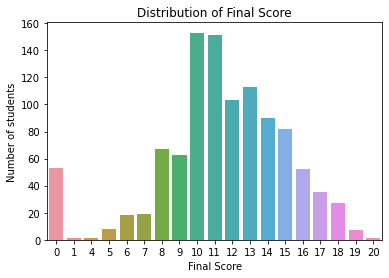

In [43]:
# G3 : final score distribution
tmp_plt = sns.countplot(x = 'final_score', data = student_df)
tmp_plt.axes.set_title('Distribution of Final Score')
tmp_plt.set_xlabel('Final Score')
tmp_plt.set_ylabel('Number of students')
plt.show()

**Observation:**

 - The distribution look like a normal distribution which is ideal.
 - There are a lot of students that score `0` in the final grade.This is intriguing.As there are no null values for other rows, it means that these are legitmate values. It will be interesting to see in the final analysis if I can find key features which can predict `0`grade.

## Gender

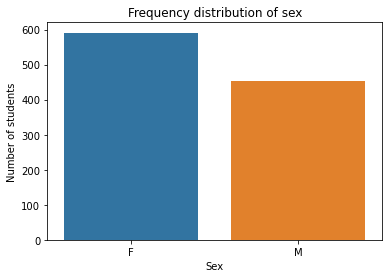

In [44]:
tmp_plt = sns.countplot(x = "sex", data = student_df)
tmp_plt.axes.set_title('Frequency distribution of sex')
tmp_plt.set_xlabel('Sex')
tmp_plt.set_ylabel('Number of students')
plt.show()

There are a higher number of females in the dataset.Let's see if gender has any relationship with academic success.

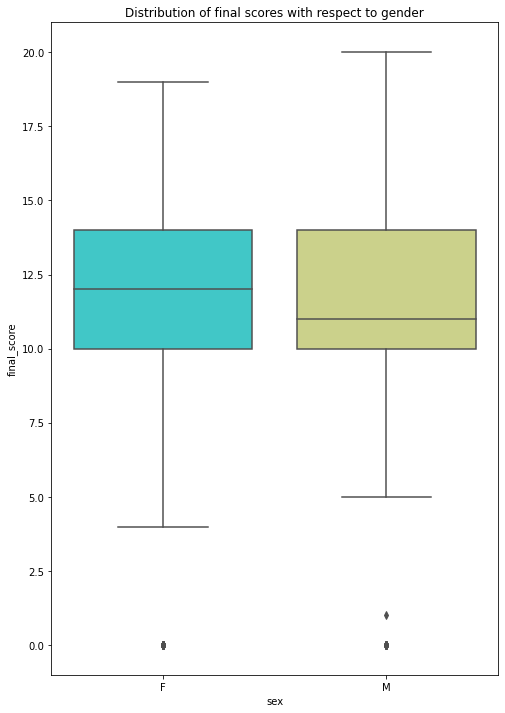

In [45]:
plt.figure(figsize=(8, 12))
plt.title("Distribution of final scores with respect to gender")
sns.boxplot(y="final_score", x="sex", data = student_df, palette ="rainbow");

From the graph, I can see that overall distribution of scores is very similar for both the genders. The median final score is slightly lower for males than females.

In [46]:
print('Median final score for males:', student_df[student_df['sex']=='M']['final_score'].median())
print('Median final score for females:', student_df[student_df['sex']=='F']['final_score'].median())

Median final score for males: 11.0
Median final score for females: 12.0


Let's see if this difference is significant by running a [t-test](https://www.investopedia.com/terms/t/t-test.asp):

In [47]:
male_student_scores = student_df[student_df['sex']=='M']['final_score'].values
female_student_scores = student_df[student_df['sex']=='F']['final_score'].values

In [48]:
# Running a two-tailed t test https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
t_value,p_value=scipy.stats.ttest_ind(male_student_scores,female_student_scores)

print('Test statistic is %f'%float("{:.6f}".format(t_value)))
print('p-value for two tailed test is %f'%p_value)

Test statistic is -1.016422
p-value for two tailed test is 0.309664


In [49]:
alpha = 0.05
# testing for significance
if p_value<=alpha:
    print('Difference between male and female final scores is statistically significant')
else:
    print('Difference between male and female final scores is not statistically significant')

Difference between male and female final scores is not statistically significant


So, while the graph showed some difference between the final scores of both genders, this difference is not statistically significant.

## Age

In [50]:
# Frequency distribution of student age
student_df["age"].value_counts()

16    281
17    277
18    222
15    194
19     56
20      9
21      3
22      2
Name: age, dtype: int64

In [51]:
# Pie chart for age frequency distribution
ages = student_df["age"].value_counts().sort_index()

# all ages
labels = (np.array(ages.index))

# corresponding percentages of each age
sizes = (np.array((ages / ages.sum())*100))

# plotting pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=sizes)], layout=go.Layout(title="Student Age"))
py.iplot(fig, filename = "age")

Students are between `15` and `22` years old. `16` and `17` year olds are the most common. Let's see if age can determine academic success:

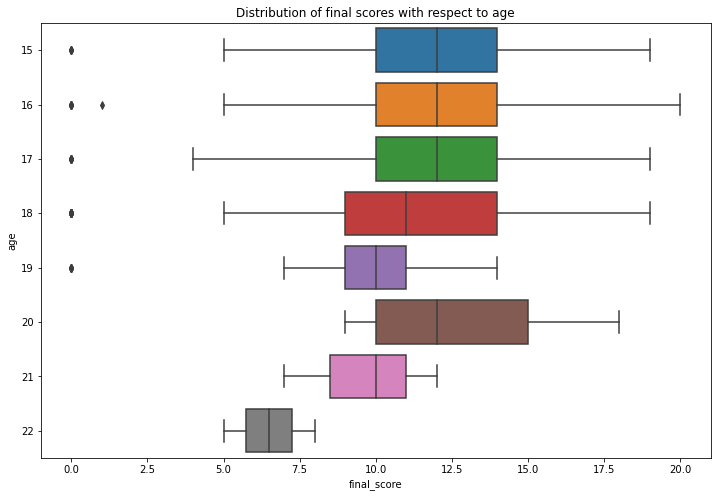

In [52]:
plt.figure(figsize=(12,8))
plt.title("Distribution of final scores with respect to age")
sns.boxplot(y="age", x="final_score", orient = 'h', data = student_df);

The boxplots seem to indicate that higher ages(20-22) result in poor grades.But we saw in value counts, that these 3 ages had only few datapoints.Let's look at the swarmplot here:

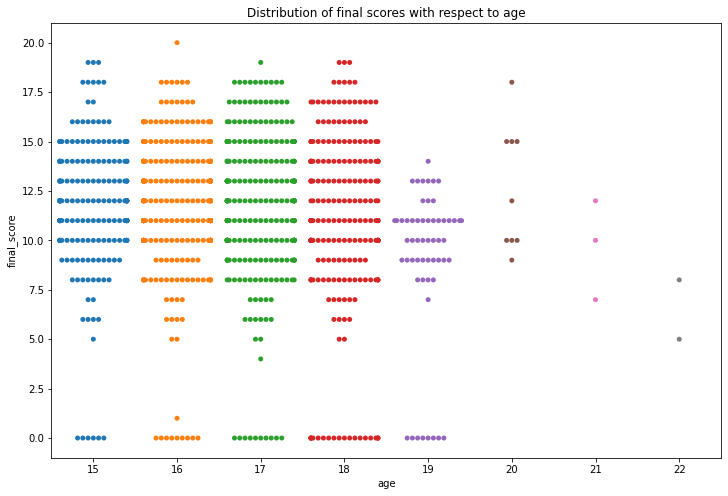

In [53]:
plt.figure(figsize = (12,8))
plt.title("Distribution of final scores with respect to age")
sns.swarmplot(y="final_score", x="age", data = student_df);

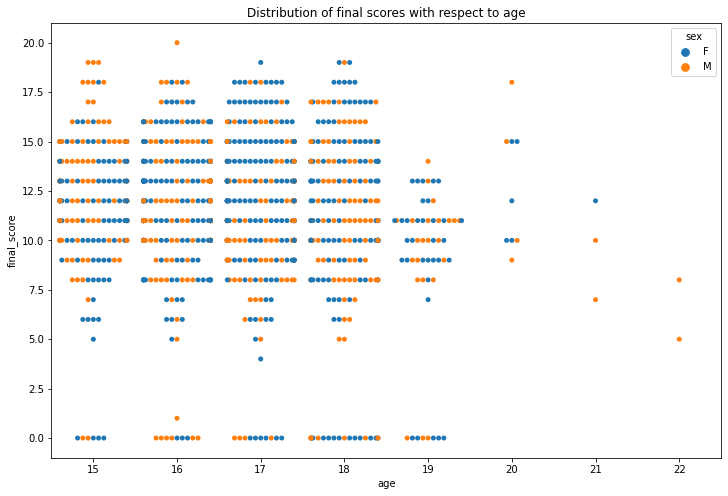

In [54]:
plt.figure(figsize = (12,8))
plt.title("Distribution of final scores with respect to age")
sns.swarmplot(y="final_score", x="age", hue="sex", data = student_df);

The above graph indicates that there is no clear relation of age or gender with final score.

This is good news.While using machine learning for business applications, I must cafefully not to propogate any bias towards any demographic.Now, that these features are not directly related to the model, I can choose to remove them in my final model.

## Study Time

According to [data documentation](https://archive.ics.uci.edu/ml/datasets/student+performance), `studytime` column encodes weekly study time of student where:

 - 1 -<2 hours
 - 2 -2 to 5 hours
 - 3 -5 to 10 hours
 - 4 - >10 hours
 

In [57]:
# function to convert study time encoding to actual meaning
def convertor_function(study_time):
    if study_time == 1:
        return '<2 hours'
    elif study_time == 2:
        return '2 to 5 hours'
    elif study_time == 3:
        return '5 to 10 hours'
    elif study_time == 4:
        return '>10 hours'
    
student_df['new_study_time'] = student_df['study_time'].apply(convertor_function)

student_df[['study_time', 'new_study_time']].sample(10)

,study_time,new_study_time
744,4,>10 hours
18,1,<2 hours
11,3,5 to 10 hours
985,2,2 to 5 hours
1035,1,<2 hours
902,3,5 to 10 hours
449,1,<2 hours
936,2,2 to 5 hours
530,1,<2 hours
711,2,2 to 5 hours


In [60]:
# Pie chart for study frequency distribution
study_times = student_df["new_study_time"].value_counts().sort_index()

# all study times
labels = (np.array(study_times.index))

# corresponding percentages of each age
sizes = (np.array((study_times / study_times.sum())*100))

# plotting pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=sizes)], layout=go.Layout(title="Student Study Time"))
py.iplot(fig, filename="study_time")

Almost 50% of the student in the dataset study 2-5 hours. Let's see if there is a relationship between study time and final score using boxplots:

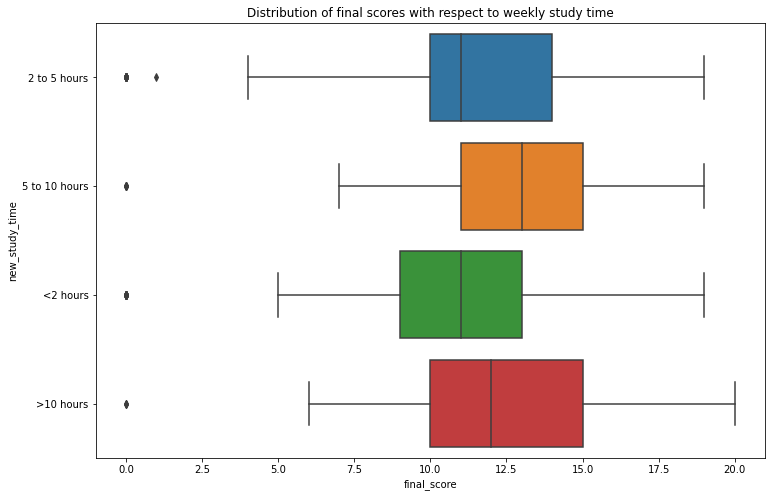

In [61]:
plt.figure(figsize=(12,8))
plt.title("Distribution of final scores with respect to weekly study time")
sns.boxplot(y="new_study_time", x="final_score", orient='h', data = student_df);

In [62]:
print('Average score of students studying <2 hours weekly', student_df[student_df['new_study_time']=='<2 hours'].final_score.mean())
print('Average score of students studying 2 to 5 hours weekly', student_df[student_df['new_study_time']=='2 to 5 hours'].final_score.mean())
print('Average score of students studying 5 to 10 hours weekly', student_df[student_df['new_study_time']=='5 to 10 hours'].final_score.mean())
print('Average score of students studying >10 hours weekly', student_df[student_df['new_study_time']=='>10 hours'].final_score.mean())

Average score of students studying <2 hours weekly 10.580441640378549
Average score of students studying 2 to 5 hours weekly 11.335984095427435
Average score of students studying 5 to 10 hours weekly 12.493827160493828
Average score of students studying >10 hours weekly 12.274193548387096


I see that as study time increases, the avarage score of the student increases. I can run a hypothesis test to check for significance of this result.

In [66]:
study_less_than_2_scores = student_df[student_df['new_study_time']=='<2 hours'].final_score
study_2_to_5_scores = student_df[student_df['new_study_time']=='2 to 5 hours'].final_score
study_5_to_10_scores = student_df[student_df['new_study_time']=='5 to 10 hours'].final_score
study_greater_than_10_scores = student_df[student_df['new_study_time']=='>10 hours'].final_score

I will run a [One-Way ANOVA test](https://www.simplypsychology.org/anova.html) to check if there is exists a statistically significant difference between the mean score of different study time.

In [67]:
# running a one-way ANOVA test https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html
t_value, p_value = scipy.stats.f_oneway(study_less_than_2_scores, study_2_to_5_scores, study_5_to_10_scores, study_greater_than_10_scores)

print('Test statistics is %f'%float("{:.6f}".format(t_value)))
print('p_value for ANOVA test is %f'%p_value)

Test statistics is 10.374445
p_value for ANOVA test is 0.000001


In [68]:
alpha = 0.05
#testing for significance
if p_value<=alpha:
    print('Difference between final scores for different study time is statistically significantly')
else:
    print('Difference between final scores for different study time is not statistically significantly')

Difference between final scores for different study time is statistically significantly


Thus, I see that in the data, study time is a significant component for academic success and studying more will lead to better results.

## Address (U - Urban, R- Rural)

`address` column contains information about student's home address type.

 - "U" -urban
 - "R" -rural
 
This might be an important feature predicting academic success.Urban students might have easier access to alcohol and other fun activities which can result in distraction.Rural students might have less incentive to go to school.Let's look at their frequency distribution first.

In [69]:
student_df['address'].value_counts()

U    759
R    285
Name: address, dtype: int64

So, vast majority are urban students.Let's see if a direct relationship exists between address and final_grade.

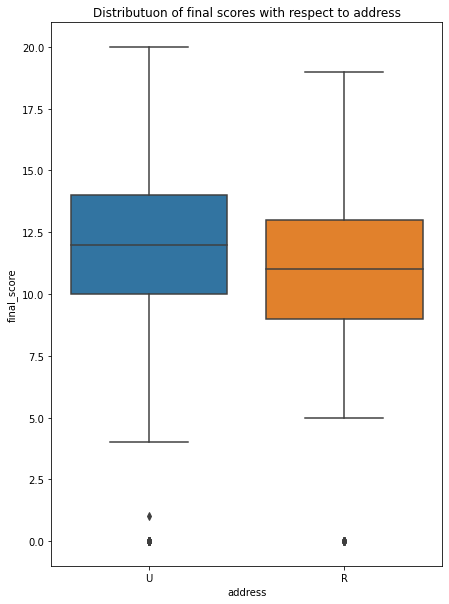

In [70]:
plt.figure(figsize=(7,10))
plt.title("Distributuon of final scores with respect to address")
sns.boxplot(y="final_score", x="address", data = student_df);

Boxplots indicate that students residing in urban areas tend to perform better than students residing in rural areas.Let's look at the distributions further using [KDE plots](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) to better understand the differences.

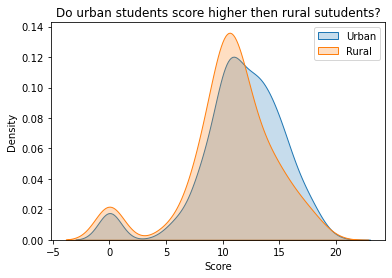

In [72]:
sns.kdeplot(student_df[student_df['address'] == 'U']['final_score'], label='Urban', shade = True)
sns.kdeplot(student_df[student_df['address'] == 'R']['final_score'], label='Rural', shade = True)
plt.title( 'Do urban students score higher then rural sutudents?')
plt.xlabel('Score')
plt.ylabel('Density')
plt.legend()
plt.show()

In this plot, both the distribution seem similar.Let's run a two-tailed t-test to check whether the difference in the mean score for urban students and the mean score for ruarl students is statiscally significant.

In [73]:
urban_student_scores = student_df[student_df['address'] == 'U']['final_score'].values
rural_student_scores = student_df[student_df['address'] == 'R']['final_score'].values

In [75]:
# Running a two-tailded t-test https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
t_value, p_value = scipy.stats.ttest_ind(urban_student_scores, rural_student_scores)

print('Test statistic is %f'%float("{:.6f}".format(t_value)))
print('p-value for two tailed test id %f'%p_value)

Test statistic is 3.825806
p-value for two tailed test id 0.000138


In [78]:
alpha = 0.05
#testing for significance
if p_value<=alpha:
    print('Difference between urban and rural final scores is statistacally significant')
else:
    print('Difference between urban and rural final scores is not statistically significant')

Difference between urban and rural final scores is statistacally significant


Now I know that Rural students tend to score less than Urban ones.Let's try and analyze a variety of factors that might cause this.One of them I believe is `commute_time`.

According to [data documentation](https://archive.ics.uci.edu/ml/datasets/student+performance), `commute_time` column encodes home to school travel time of a student where:

 - 1 - <15 mins
 - 2 - 15 to 30 mins
 - 3 - 30 mins to 1 hour
 - 4 - >1 hour

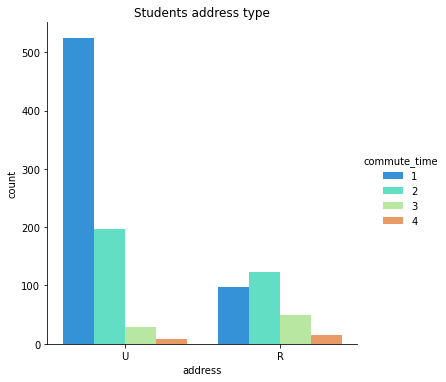

In [79]:
sns.catplot(x="address", kind="count", hue = "commute_time", palette = "rainbow", data = student_df)
plt.title("Students address type")
plt.show()

It seems like rural students tend to have higher commute times.

In [80]:
print('Number of Rural Students with commute time > 1 hour:', len(student_df[(student_df['address']=='R') & (student_df['commute_time']==4)]))
print('Number of Urban Students with commute time > 1 hour:',len(student_df[(student_df['address']=='U') & (student_df['commute_time']==4)]))

Number of Rural Students with commute time > 1 hour: 15
Number of Urban Students with commute time > 1 hour: 9


It is well known that students with higher commute thime usually get less time to study and thus there studies suffer.(Source: [Kobus et al.,2018](https://www.sciencedirect.com/science/article/abs/pii/S0166046215000216))

Let's see if that happens in this dataset as well:

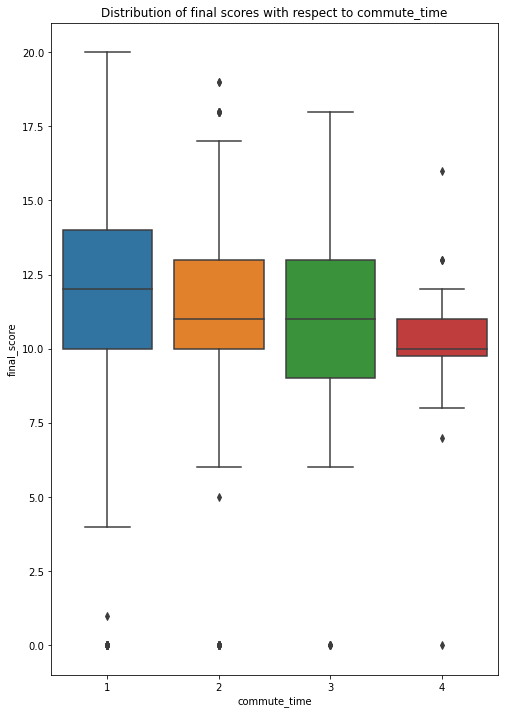

In [83]:
plt.figure(figsize=(8,12))
plt.title("Distribution of final scores with respect to commute_time")
sns.boxplot(y="final_score", x="commute_time", data = student_df);

The graph clearly depicts a downward trend with respect to travel time.

Schools in many countries consider commute time a criteria while admitting students.There are multiple studies that indicate higher commute times have adverse affect on student health as well(Source:[Pradhan et al.,2017](https://www.researchgate.net/publication/313851579_Impact_of_commuting_distance_and_school_timing_on_sleep_of_school_students)).

So, this graph tends as a proof that parents should prefer schools with lower commute times.

Another factor that might lead to the poor performance of ruaral students is access to `internet`.

`internet` column encodes whether a student has access to internet or not at home.Let's look at the frequency distribution for internet access.

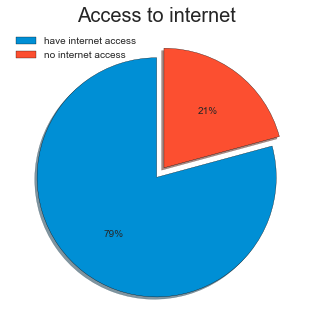

In [84]:
# Draw Pie-Chart of frequency distribution for internet access
plt.style.use('seaborn')
total_internet = student_df['internet'].value_counts().to_frame().T
labels = 'have internet access', 'no internet access'
colors = ['#008fd5', '#fc4f30']
explode = (0, 0.1)
explode2 = (0.2, 0)
plt.tight_layout()
plt.pie(total_internet.iloc[0], startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'}, autopct='%1.f%%', explode=explode, shadow=True)
plt.legend(loc='best', labels=labels, fontsize='medium')
plt.title('Access to internet', fontsize = 20)
plt.show()

Roughly 80% of all students in the dataset have access to internet.Let's see if this distribution is different for rural and urban areas.

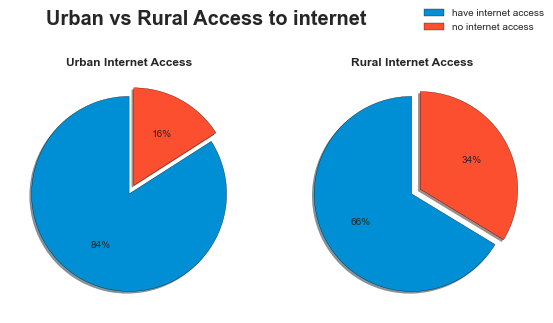

In [85]:
# Draw Pie-Chart of frequency distribution for internet access for urban and rural areas
plt.style.use('seaborn')
urban_internet = student_df[student_df['address']=='U']['internet'].value_counts().to_frame().T
rural_internet = student_df[student_df['address']=='R']['internet'].value_counts().to_frame().T

labels = 'have internet access', 'no internet access'
colors = ['#008fd5', '#fc4f30']

fig, ax = plt.subplots(nrows=1, ncols=2)

explode = (0, 0.1)

plt.tight_layout()
ax[0].pie(urban_internet.iloc[0], startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'}, autopct='%1.f%%', explode=explode, shadow=True)
ax[0].set_title('Urban Internet Access', fontweight='bold')

ax[1].pie(rural_internet.iloc[0], startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'}, autopct='%1.f%%', explode=explode, shadow=True)
ax[1].set_title('Rural Internet Access', fontweight='bold')



fig.legend(labels=labels, fontsize='medium')
plt.suptitle('Urban vs Rural Access to internet', fontsize = 20, fontweight='bold', x = 0.4)
plt.show()

As expected, ahigher proportion of urban students have access to internet. 84% of urban students have access to internet vs 66% students with internet access for rural areas.

Studies have shown that having access to internet improves academic performance([Source : NCES](https://nces.ed.gov/pubs2017/2017098/ind_15.asp)).Let's see if that's the case in this dataset as well.

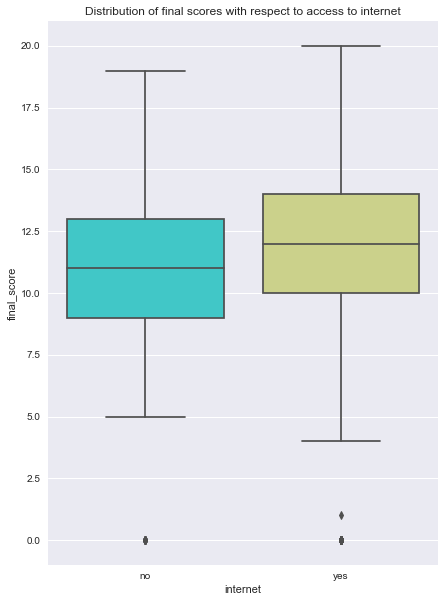

In [87]:
plt.figure(figsize=(7,10))
plt.title("Distribution of final scores with respect to access to internet")
sns.boxplot(y="final_score", x="internet", data = student_df, palette ="rainbow");

Box plot indicates a higher score for students with internet access.

In [91]:
print('Mean final score for students with internet access:', student_df[student_df['internet'] == 'yes']['final_score'].median())
print('Mean final score for students without internet access:', student_df[student_df['internet'] == 'no']['final_score'].median())

Mean final score for students with internet access: 12.0
Mean final score for students without internet access: 11.0


Thus, if students get internet access at home, they tend to perform better.It is important to monitor student internet usage though, as it might lead to an endless cycle of video games or youtube videos.

School districs should also work with students who don't have access to internet and see if some arrangements can be made to help such students in this day and age of online learning.Some tips include:

 1. Encouraging students to use community resources like public libraries.
 2. Make remote learning accessible through offline features.
 3. Provid mobile hotspots to students from disadvantaged backgrounds.

## Wish to go for Higher Education

`desire_higher_edu` column indicates whether student wants to take higher education or not.Let's look at its frequency distribution:

In [92]:
student_df['desire_higher_edu'].value_counts()

yes    955
no      89
Name: desire_higher_edu, dtype: int64

It's nice to see that majority of the students wish yo opt for higher (college) education. This data is slightly old and is for portugese students.There has been decline in the number of students wanting to opt for university.

In US, about 75% high school students plan on going for higher education([Source:EAB](https://eab.com/insights/daily-briefing/enrollment/75-of-teens-plan-to-attend-higher-ed-after-high-school/)).

As a lot of higher education programs consider academic performance in the addmission criteria, it is expected that students who desire to go that path will focus more on earning a better grade.Let's see if that's the case in this dataset.

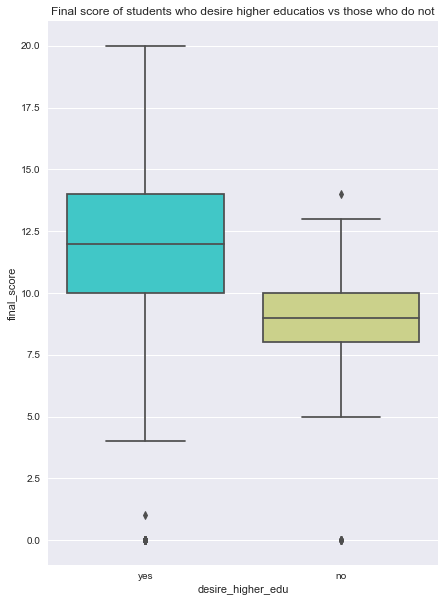

In [93]:
plt.figure(figsize=(7,10))
plt.title("Final score of students who desire higher educatios vs those who do not")
sns.boxplot(y="final_score", x="desire_higher_edu", data = student_df, palette = "rainbow");

There is very significant trend here. This seems to be very important feature in predicting academic success.

Students who desire to go for higher education perform better in high-school finals.

## Going out with Friends